In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [20]:
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


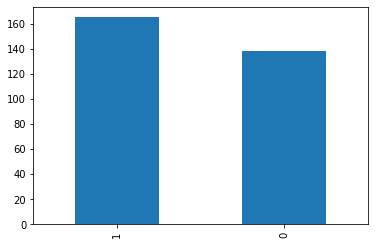

In [3]:
df.target.value_counts().plot(kind='bar')
plt.show()

In [4]:
X=df.iloc[:,:-1]
y=df['target']
print(X.shape, y.shape)

(303, 13) (303,)


In [22]:
featSelector = SelectKBest(chi2,k=2)
featSelector.fit(X,y)
print(featSelector.scores_)
print(featSelector.get_feature_names_out())

[ 23.28662399   7.57683451  62.59809791  14.8239245   23.93639448
   0.20293368   2.97827075 188.32047169  38.91437697  72.64425301
   9.8040952   66.44076512   5.79185297]
['thalach' 'oldpeak']


In [23]:
features = X[featSelector.get_feature_names_out()]
features.head()
scaler = StandardScaler()
scaledX = scaler.fit_transform(features)


In [24]:
xtrain, xtest, ytrain, ytest = train_test_split(scaledX,y,test_size=.2,random_state=1)

In [26]:
clf = SVC(kernel='linear')
clf.fit(xtrain,ytrain)

SVC(kernel='linear')

In [27]:
ypred = clf.predict(xtrain)
print(confusion_matrix(ytrain,ypred))
print(classification_report(ytrain,ypred))


[[ 66  42]
 [ 22 112]]
              precision    recall  f1-score   support

           0       0.75      0.61      0.67       108
           1       0.73      0.84      0.78       134

    accuracy                           0.74       242
   macro avg       0.74      0.72      0.73       242
weighted avg       0.74      0.74      0.73       242



In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=3)
decomposed_X = pca.fit_transform(X)

In [12]:
decomposed_X

array([[-1.22673448e+01,  2.87383781e+00,  1.49698788e+01],
       [ 2.69013712e+00, -3.98713736e+01,  8.77882303e-01],
       [-4.29502141e+01, -2.36368199e+01,  1.75944589e+00],
       [-1.09447564e+01, -2.84380358e+01, -7.04418048e+00],
       [ 1.06979053e+02, -1.58744678e+01, -1.48615748e+01],
       [-5.36472038e+01,  4.00392377e+00,  1.10883877e+01],
       [ 4.80821551e+01, -3.03896086e+00,  6.43875851e+00],
       [ 1.55660590e+01, -2.62745637e+01, -1.05743709e+01],
       [-4.54388962e+01, -7.42977739e+00,  4.33597187e+01],
       [-7.73163161e+01, -1.99100759e+01,  2.55062985e+01],
       [-6.94323738e+00, -9.17536374e+00,  9.87463009e+00],
       [ 2.84259379e+01,  8.47126467e+00, -5.23558004e+00],
       [ 1.92477377e+01, -2.24212575e+01, -5.30201247e-01],
       [-3.58055558e+01,  5.70343964e+00, -1.89482661e+01],
       [ 3.75886896e+01, -1.02579437e+01,  1.82433206e+01],
       [-2.79998518e+01, -9.64570379e+00, -9.49412834e+00],
       [ 9.29750393e+01, -2.42584272e+01

In [13]:
px.scatter_3d(x=decomposed_X[:,0],y=decomposed_X[:,1],z=decomposed_X[:,2], color=y.values)

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(decomposed_X,y,test_size=.2,random_state=1)

In [15]:
clf = SVC(kernel='rbf')
clf.fit(xtrain,ytrain)

SVC()

In [16]:
ypred = clf.predict(xtrain)
print(confusion_matrix(ytrain,ypred))
print(classification_report(ytrain,ypred))

[[ 66  42]
 [ 21 113]]
              precision    recall  f1-score   support

           0       0.76      0.61      0.68       108
           1       0.73      0.84      0.78       134

    accuracy                           0.74       242
   macro avg       0.74      0.73      0.73       242
weighted avg       0.74      0.74      0.74       242



In [17]:
decomposed_f = pca.fit_transform(scaledX)
xtrain, xtest, ytrain, ytest = train_test_split(decomposed_f,y,test_size=.2,random_state=1)
clf = SVC(kernel='rbf')
clf.fit(xtrain,ytrain)
ypred = clf.predict(xtrain)
print(confusion_matrix(ytrain,ypred))
print(classification_report(ytrain,ypred))

[[ 88  20]
 [ 10 124]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       108
           1       0.86      0.93      0.89       134

    accuracy                           0.88       242
   macro avg       0.88      0.87      0.87       242
weighted avg       0.88      0.88      0.88       242



In [18]:
from utils import plot_area_distribution

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


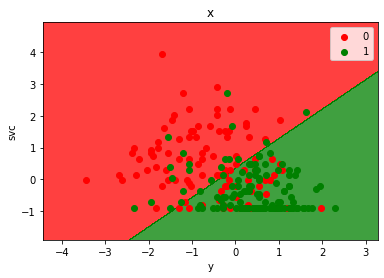

In [28]:
plot_area_distribution(clf,xtrain,ytrain,"x","y","svc")